In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
#from google.colab import drive
#drive.mount('/content/drive')


In [4]:
df1 = pd.read_csv('/content/UNSW_2018_IoT_Botnet_Full5pc_1.csv')
df2 = pd.read_csv('/content/UNSW_2018_IoT_Botnet_Full5pc_2.csv')
df3 = pd.read_csv('/content/UNSW_2018_IoT_Botnet_Full5pc_3.csv')
df4 = pd.read_csv('/content/UNSW_2018_IoT_Botnet_Full5pc_4.csv')

In [5]:
file_paths = ['/content/UNSW_2018_IoT_Botnet_Full5pc_1.csv',
              '/content/UNSW_2018_IoT_Botnet_Full5pc_2.csv',
              '/content/UNSW_2018_IoT_Botnet_Full5pc_3.csv',
              '/content/UNSW_2018_IoT_Botnet_Full5pc_4.csv']
data_frames = []
for file_path in file_paths:
    df = pd.read_csv(file_path)
    # Get the actual number of rows in the DataFrame
    num_rows = df.shape[0]
    # Ensure sample_size is not larger than the DataFrame
    sample_size = min(num_rows, 25000)
    df_sample = df.sample(n=sample_size, random_state=42)
    data_frames.append(df_sample)
    # Avoid sampling twice with the same random state (it'll give you the same sample)
    # If you need another sample, use a different random_state or remove this line.
    # df_sample = df.sample(n=sample_size, random_state=42)
    # data_frames.append(df_sample)

In [6]:
# Merge datasets
merged_df = pd.concat([df1, df2, df3, df4], ignore_index=True)

# Drop missing values and duplicates
merged_df.dropna(inplace=True)
merged_df.drop_duplicates(inplace=True)
merged_df.reset_index(drop=True, inplace=True)


In [10]:
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

# Drop them and assign back to the DataFrame
df = df.drop(columns=non_numeric_columns)

# Confirm removal
print("Non-numeric columns after dropping:")
print(non_numeric_columns.tolist())

Non-numeric columns after dropping:
[]


In [11]:
X = merged_df.drop('attack', axis=1)
y = merged_df['attack']

In [12]:
X = df.drop(columns=['attack'])

In [13]:
print("shape:",df.shape)
print("\nFirst 5 rows of the DataFrame:")
print(df.head())

shape: (7287, 39)

First 5 rows of the DataFrame:
   pkSeqID         stime  flgs_number  proto_number   sport  dport  pkts  \
0  3000001  1.528099e+09            1             3  6226.0   80.0  15.0   
1  3000002  1.528099e+09            1             3  6227.0   80.0  15.0   
2  3000003  1.528099e+09            1             3  6228.0   80.0  15.0   
3  3000004  1.528099e+09            1             3  6229.0   80.0  15.0   
4  3000005  1.528099e+09            1             3  6230.0   80.0  15.0   

   bytes  state_number         ltime  ...  TnP_Per_Dport  AR_P_Proto_P_SrcIP  \
0  900.0           4.0  1.528099e+09  ...         1500.0             1.09825   
1  900.0           4.0  1.528099e+09  ...         1500.0             1.09825   
2  900.0           4.0  1.528099e+09  ...         1500.0             1.09825   
3  900.0           4.0  1.528099e+09  ...         1500.0             1.09825   
4  900.0           4.0  1.528099e+09  ...         1500.0             1.09825   

   AR_P_Prot

In [17]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

le = LabelEncoder()
for col in merged_df.select_dtypes(include=['object']).columns:
        merged_df[col] = le.fit_transform(merged_df[col].astype(str))


for col in merged_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    merged_df[col] = le.fit_transform(merged_df[col].astype(int))

for col in merged_df.select_dtypes(include=['object']).columns:
    print(col,merged_df[col].nunique(),"\n",data[col].value_counts())



In [18]:
numeric_cols = merged_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = MinMaxScaler()
merged_df[numeric_cols] = scaler.fit_transform(merged_df[numeric_cols])
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel


In [19]:
X = merged_df.drop('attack', axis=1)
y = merged_df['attack']

print(y.unique())

[0.]


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [21]:
display(merged_df.shape,
        merged_df.size,
        merged_df.info(),
        merged_df.describe(),
        merged_df.isna().sum(),
        merged_df.isnull().sum(),
        merged_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18722 entries, 0 to 18721
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   pkSeqID                           18722 non-null  float64
 1   stime                             18722 non-null  float64
 2   flgs                              18722 non-null  float64
 3   flgs_number                       18722 non-null  float64
 4   proto                             18722 non-null  float64
 5   proto_number                      18722 non-null  float64
 6   saddr                             18722 non-null  float64
 7   sport                             18722 non-null  float64
 8   daddr                             18722 non-null  float64
 9   dport                             18722 non-null  float64
 10  pkts                              18722 non-null  float64
 11  bytes                             18722 non-null  float64
 12  stat

(18722, 46)

861212

None

,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
count,18722.000000,18722.000000,18722.000000,18722.000000,18722.000000,18722.000000,18722.000000,18722.000000,18722.000000,18722.000000,...,18722.000000,18722.000000,18722.000000,18722.000000,18722.000000,18722.000000,18722.000000,18722.0,18722.000000,18722.000000
mean,0.586429,0.618906,0.257598,0.072930,0.793986,0.588532,0.161530,0.394754,0.627773,0.999626,...,0.000266,0.951348,0.824284,0.000243,0.000196,0.574588,0.503016,0.0,0.413684,0.754513
std,0.392172,0.391543,0.357944,0.117116,0.246486,0.492018,0.181980,0.327248,0.204211,0.019333,...,0.013503,0.149029,0.244356,0.012851,0.012044,0.269896,0.269259,0.0,0.492506,0.319600
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.332747,0.201534,0.000000,0.000000,0.500000,0.000000,0.000000,0.074629,0.500000,1.000000,...,0.000021,1.000000,0.707071,0.000023,0.000024,0.332443,0.332443,0.0,0.000000,0.500000
50%,0.665589,0.800621,0.000000,0.000000,1.000000,1.000000,0.166667,0.392049,0.500000,1.000000,...,0.000031,1.000000,1.000000,0.000036,0.000035,0.532710,0.460614,0.0,0.000000,1.000000
75%,0.998444,0.999999,0.750000,0.200000,1.000000,1.000000,0.333333,0.732918,0.833333,1.000000,...,0.000058,1.000000,1.000000,0.000060,0.000066,0.796395,0.732977,0.0,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


,0
pkSeqID,0
stime,0
flgs,0
flgs_number,0
proto,0
proto_number,0
saddr,0
sport,0
daddr,0
dport,0


,0
pkSeqID,0
stime,0
flgs,0
flgs_number,0
proto,0
proto_number,0
saddr,0
sport,0
daddr,0
dport,0


np.int64(0)

In [22]:
merged_df = merged_df.dropna()
merged_df = merged_df.drop_duplicates()

In [23]:
for col in merged_df.select_dtypes(include=['float']).columns:
    merged_df[col]=merged_df[col].astype(np.float32)
for col in merged_df.select_dtypes(include=['int']).columns:
    merged_df[col]=merged_df[col].astype(np.int8)

In [24]:
from sklearn.preprocessing import StandardScaler
numeric_data = merged_df.select_dtypes(exclude=['object']).columns # Use merged_df instead of data
scaller = StandardScaler()
scalled_data = merged_df.copy() # Use merged_df instead of data
scalled_data[numeric_data] = scaller.fit_transform(merged_df[numeric_data]) # Use merged_df instead of data

In [25]:
for col in merged_df.columns:
    display(merged_df[col].value_counts())

,count
pkSeqID,
1.000000e+00,1
0.000000e+00,1
9.999947e-01,1
9.999943e-01,1
9.999940e-01,1
...,...
1.995155e-06,1
1.662629e-06,1
1.330103e-06,1


,count
stime,
0.999999,691
1.000000,660
0.999999,653
1.000000,576
1.000000,576
...,...
0.000000,1
0.399635,1
0.399636,1


,count
flgs,
0.00,12320
0.75,6287
1.00,102
0.50,9
0.25,4


,count
flgs_number,
0.0,12320
0.2,6287
1.0,102
0.4,9
0.6,4


,count
proto,
1.0,11015
0.5,7700
0.0,7


,count
proto_number,
1.0,11015
0.0,7700
0.5,7


,count
saddr,
0.000000,8662
0.166667,4748
0.500000,2756
0.333333,2551
1.000000,3
0.833333,1
0.666667,1


,count
sport,
0.000000,7
0.058994,2
0.059009,2
0.059024,2
0.059070,2
...,...
0.580252,1
0.580267,1
0.580282,1


,count
daddr,
0.500000,12895
1.000000,3817
0.666667,1097
0.833333,908
0.000000,2
0.166667,2
0.333333,1


,count
dport,
1.0,18715
0.0,7


,count
pkts,
0.055556,3342
0.166667,3311
0.240741,3081
0.092593,2476
0.111111,1940
0.148148,1343
0.203704,1088
0.074074,683
0.037037,638


,count
bytes,
0.094490,3342
0.078500,3262
0.113389,3076
0.043611,1863
0.095944,1085
...,...
0.295246,1
0.334351,1
0.331298,1


,count
state,
0.333333,11015
0.666667,4625
1.000000,3075
0.000000,7


,count
state_number,
1.000000,11015
0.666667,4625
0.000000,3075
0.333333,7


,count
ltime,
0.999996,384
0.999996,384
0.999997,384
0.999997,384
0.999999,341
...,...
0.399118,1
0.398612,1
0.398613,1


,count
seq,
0.008022,2
0.008014,2
0.008006,2
0.007998,2
0.007990,2
...,...
0.700537,1
0.700545,1
0.700554,1


,count
dur,
0.017272,151
0.017272,110
0.017501,91
0.008779,84
0.008813,83
...,...
0.021377,1
0.019656,1
0.019654,1


,count
mean,
0.000000,2329
0.796261,84
0.796241,73
0.730562,65
0.728732,64
...,...
0.728929,1
0.438255,1
0.438700,1


,count
stddev,
0.000000,2372
0.559435,87
0.781849,75
0.733557,67
0.733524,66
...,...
0.007065,1
0.007073,1
0.007851,1


,count
sum,
0.000000,2329
0.734176,55
0.449084,53
0.480119,52
0.480107,51
...,...
0.415481,1
0.415481,1
0.415480,1


,count
min,
0.000000,8683
0.562356,102
0.562403,81
0.562379,80
0.562412,77
...,...
0.820582,1
0.820581,1
0.402215,1


,count
max,
0.000000,2329
0.985868,90
0.985868,84
0.907861,79
0.828668,76
...,...
0.938059,1
0.936129,1
0.934216,1


,count
spkts,
0.148148,4039
0.370370,3267
0.518519,3076
0.222222,2554
0.185185,2016
0.259259,1193
0.444444,1088
0.111111,637
0.481481,610


,count
dpkts,
0.000000,15439
0.035714,1433
0.142857,962
0.107143,534
0.071429,342
0.178571,9
0.214286,2
1.000000,1


,count
sbytes,
0.122161,3354
0.103235,3262
0.144529,3078
0.061941,1863
0.123882,1088
...,...
0.155540,1
0.161734,1
0.145733,1


,count
dbytes,
0.000000,15439
0.035714,1433
0.455952,729
0.071429,342
0.791667,275
0.830952,232
0.416667,229
0.107143,30
0.881548,6


,count
rate,
0.000029,293
0.000029,259
0.000046,218
0.000130,198
0.000062,189
...,...
0.000039,1
0.000039,1
0.000039,1


,count
srate,
0.091997,293
0.091996,259
0.146486,218
0.408831,198
0.196843,189
...,...
0.111236,1
0.111234,1
0.111231,1


,count
drate,
0.000000,16872
0.008589,63
0.008733,48
0.019011,26
0.008258,24
...,...
0.035765,1
0.035763,1
0.035761,1


,count
TnBPSrcIP,
0.371645,1716
0.318470,1300
0.434488,1000
0.202452,900
0.231456,500
...,...
0.013975,2
0.010108,1
0.015662,1


,count
TnBPDstIP,
0.371645,1816
0.318470,1300
0.434488,1000
0.202452,900
0.231456,500
...,...
0.000000,4
0.006961,4
0.000068,2


,count
TnP_PSrcIP,
0.332443,1716
0.732977,1300
1.000000,1000
0.465955,900
0.532710,600
...,...
0.002670,3
0.020694,3
0.009346,2


,count
TnP_PDstIP,
0.332443,1816
0.732977,1300
1.000000,1000
0.465955,900
0.532710,600
...,...
0.000000,6
0.026702,6
0.016021,4


,count
TnP_PerProto,
0.332443,1816
0.732977,1300
1.000000,1000
0.465955,900
0.532710,600
...,...
0.522029,29
0.004005,3
0.001335,2


,count
TnP_Per_Dport,
0.332443,1816
0.732977,1300
1.000000,1000
0.465955,900
0.532710,600
...,...
0.522029,29
0.004005,3
0.001335,2


,count
AR_P_Proto_P_SrcIP,
0.000069,379
0.000069,365
0.000069,358
0.000069,320
0.000069,314
...,...
1.000000,1
0.000028,1
0.679146,1


,count
AR_P_Proto_P_DstIP,
0.000072,300
0.000017,290
0.000031,202
0.000052,200
0.000072,200
...,...
0.700534,1
0.386430,1
0.867546,1


,count
N_IN_Conn_P_DstIP,
1.000000,15693
0.898990,270
0.979798,196
0.939394,188
0.828283,166
0.818182,164
0.737374,148
0.656566,132
0.575758,116


,count
N_IN_Conn_P_SrcIP,
1.000000,9516
0.818182,410
0.737374,370
0.919192,276
0.757576,228
...,...
0.080808,9
0.010101,8
0.000000,7


,count
AR_P_Proto_P_Sport,
0.000083,484
0.000020,461
0.000083,447
0.000083,346
0.000083,330
...,...
0.000042,1
0.000042,1
0.000042,1


,count
AR_P_Proto_P_Dport,
0.000083,300
0.000060,200
0.000036,200
0.000083,200
0.000083,200
...,...
0.000012,16
0.000000,3
0.926380,2


,count
Pkts_P_State_P_Protocol_P_DestIP,
0.332443,1816
0.732977,1300
1.000000,1000
0.465955,900
0.866489,500
...,...
0.017356,4
0.010681,3
0.002670,2


,count
Pkts_P_State_P_Protocol_P_SrcIP,
0.332443,1716
0.732977,1300
1.000000,1000
0.465955,900
0.532710,500
...,...
0.020694,3
0.009346,2
0.003338,1


,count
attack,
0.0,18722


,count
category,
0.0,10977
1.0,7745


,count
subcategory,
1.0,11015
0.5,6222
0.0,1485


In [26]:
import matplotlib.pyplot as plt
plot=merged_df[["attack", "category", "subcategory"]]

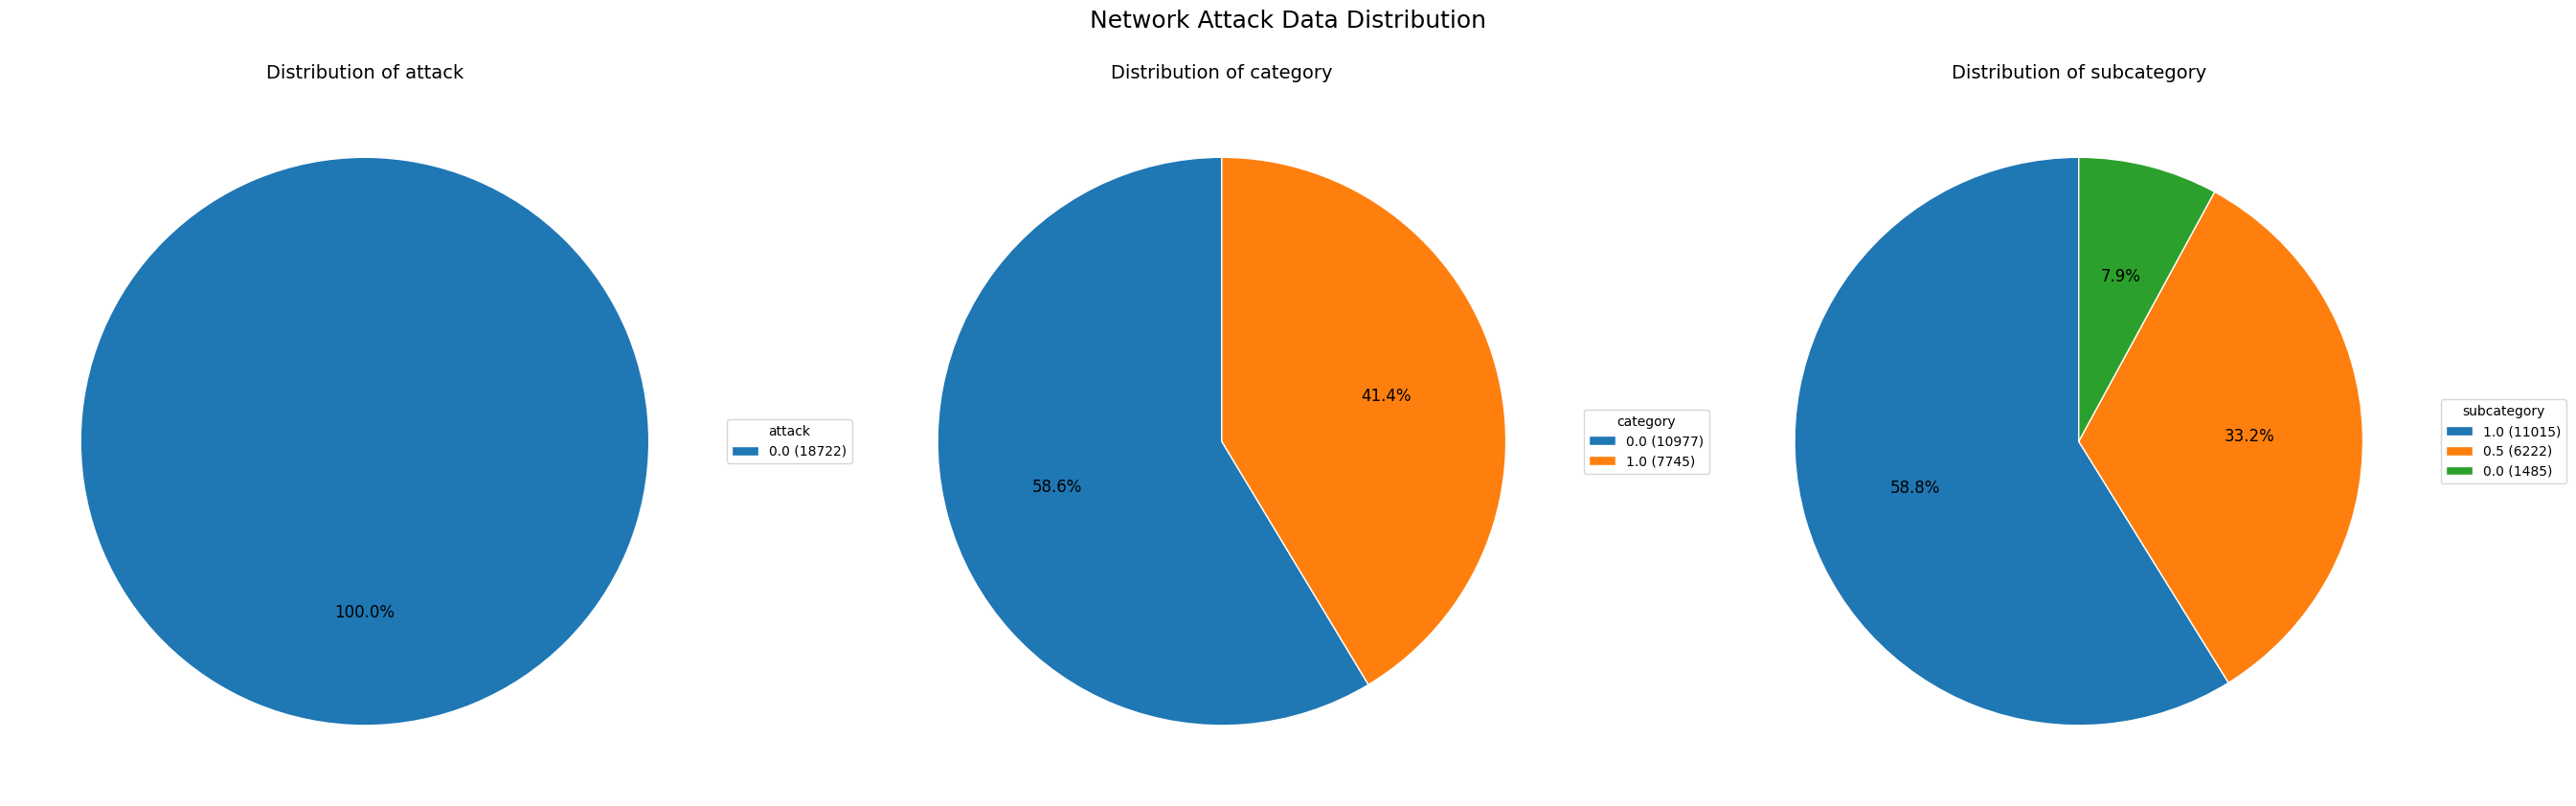

In [27]:
# Create pie charts for each column
fig, axes = plt.subplots(1, 3, figsize=(27, 9))
fig.suptitle('Network Attack Data Distribution', fontsize=18)

for i, col in enumerate(plot.columns):
    counts = plot[col].value_counts()

    # Create a pie chart with better labeling and styling
    wedges, texts, autotexts = axes[i].pie(
        counts,
        labels=None,  # We'll add a legend instead of direct labels
        autopct='%1.1f%%',
        startangle=90,
        shadow=False,
        textprops={'fontsize': 12},
        wedgeprops={'edgecolor': 'w', 'linewidth': 1}
    )

    # Add a title for each pie chart
    axes[i].set_title(f'Distribution of {col}', fontsize=14)

    # Create legend with percentage values
    labels = [f'{label} ({count})' for label, count in zip(counts.index, counts)]
    axes[i].legend(wedges, labels, title=col, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

In [30]:
x=merged_df.iloc[:,:-1]
y=merged_df.iloc[:,-1]

In [29]:
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler()
data_scaled = pd.DataFrame(
    normalizer.fit_transform(merged_df),
    columns=merged_df.columns,
    index=merged_df.index
)
merged_df = data_scaled

In [28]:
scalled_x=scalled_data.iloc[:,:-1]
scalled_y=scalled_data.iloc[:,-1]

In [31]:
for col in X_train.select_dtypes(include=['object']).columns:
    try:
        # Attempt to convert to numeric, coercing errors to NaN
        X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
        # Fill NaNs with a suitable strategy (e.g., mean, median)
        X_train[col] = X_train[col].fillna(X_train[col].mean())
    except ValueError:
        print(f"Warning: Column '{col}' could not be converted to numeric and was skipped.")

In [34]:
from imblearn.over_sampling import SMOTE
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

print("Class distribution before SMOTE:")
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(scalled_x, scalled_y, test_size=0.2, random_state=1)

smote = SMOTE(random_state=1)
X_train, y_train = smote.fit_resample(scalled_x, scalled_y)

print("\nClass distribution after SMOTE:")
print(pd.Series(y_train).value_counts())

Class distribution before SMOTE:
subcategory
1.0    11015
0.5     6222
0.0     1485
Name: count, dtype: int64


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [35]:
from sklearn.feature_selection import SelectKBest, f_classif
def anovatest(data):
    x=data.iloc[:,:-1]
    y=data.iloc[:,-1]
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)
    selector = SelectKBest(f_classif, k=10)
    X_selected = selector.fit_transform(xtrain, ytrain)

    f_scores = selector.scores_
    p_values = selector.pvalues_

    feature_scores = pd.DataFrame({
    	'Feature': xtrain.columns,
    	'F Score': f_scores,
    	'P Value': p_values
    })

    feature_scores = feature_scores.sort_values('F Score', ascending=False)
    print(feature_scores.head(10))

In [36]:
anovatest(merged_df)

         Feature       F Score  P Value
5   proto_number  2.718190e+07      0.0
4          proto  6.808730e+06      0.0
2           flgs  1.178976e+05      0.0
25        dbytes  6.457240e+04      0.0
12         state  5.821211e+04      0.0
23         dpkts  3.616347e+04      0.0
13  state_number  2.733410e+04      0.0
15           seq  1.774786e+04      0.0
11         bytes  1.528918e+04      0.0
22         spkts  1.218784e+04      0.0


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [43] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [35]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

def reftest(scalled_x,y):
    model = LogisticRegression(max_iter=1000)


    selector = RFE(estimator=model, n_features_to_select=10, step=1)
    X_selected = selector.fit_transform(scalled_x,y)

    selected_features = scalled_x.columns[selector.support_]
    print("Selected features:", selected_features.tolist())


    feature_ranking = pd.DataFrame({
        'Feature': scalled_x.columns,
        'Ranking': selector.ranking_
    })
    feature_ranking = feature_ranking.sort_values('Ranking')
    print("\nFeature ranking (1 = selected, higher = eliminated earlier):")
    print(feature_ranking)

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Convert to NumPy arrays
x_array = scalled_x.values
y_array = y.values

# Create Random Forest model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_array, y_array)

# Select features based on importance
selector = SelectFromModel(rf, threshold="mean")
X_selected = selector.transform(x_array)

# Get selected feature indices
selected_indices = selector.get_support()
selected_features = x.columns[selected_indices]
print(f"Selected {len(selected_features)} features: {selected_features.tolist()}")

Selected 14 features: ['pkSeqID', 'flgs', 'flgs_number', 'proto', 'proto_number', 'bytes', 'state', 'state_number', 'seq', 'sum', 'spkts', 'dbytes', 'TnP_PerProto', 'TnP_Per_Dport']


In [100]:
#BAGGING


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(scalled_x,scalled_y)
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Random Forest Classification Results:")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)
print("\nTop 10 Important Features:")
print(feature_importance.head(10))

Random Forest Classification Results:
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

        HTTP       1.00      1.00      1.00       291
         TCP       1.00      1.00      1.00      1259
         UDP       1.00      1.00      1.00      2195

    accuracy                           1.00      3745
   macro avg       1.00      1.00      1.00      3745
weighted avg       1.00      1.00      1.00      3745


Top 10 Important Features:
          Feature  Importance
15            seq    0.129029
12          state    0.113613
13   state_number    0.107947
4           proto    0.086265
3     flgs_number    0.067243
34  TnP_Per_Dport    0.060240
5    proto_number    0.056638
2            flgs    0.045726
11          bytes    0.039585
19            sum    0.039172
